In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv("C:/Users/tejuh/Downloads/Customer Churn.csv")

In [10]:
#inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#replacing blanks with 0 as the tenure is is just starting and converting the data type to float
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [13]:
#checking for any null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
#checking any duplicates
df["customerID"].duplicated().sum()
#df.duplicated().sum()

0

In [19]:
#converting data to more readable form
def conv(value):
    if value ==1:
        return"yes"
    else:
        return "no";

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


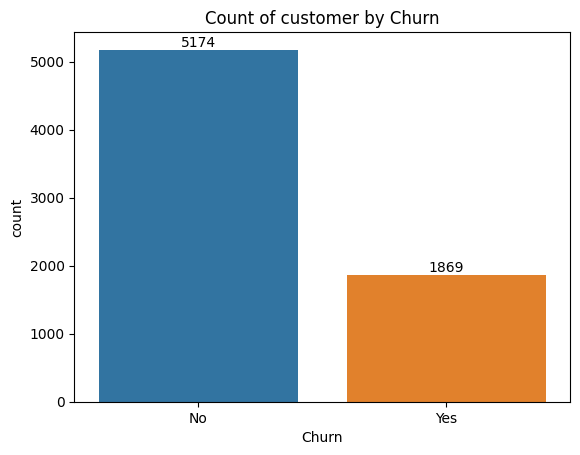

<Figure size 300x100 with 0 Axes>

In [45]:
#plotting count chart to get a broad look in churn members
ax = sns.countplot(x=df["Churn"],data=df)
ax.bar_label(ax.containers[0]) #to have total count values on containers
plt.title("Count of customer by Churn")
plt.figure(figsize=(3,1))
plt.show()

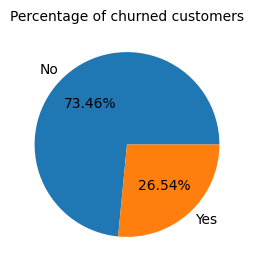

In [46]:
#checking on the churn data count in %
plt.figure(figsize=(4,3))
gp = df.groupby("Churn").agg({"Churn":"count"})
plt.title("Percentage of churned customers",fontsize=10)
plt.pie(gp["Churn"],labels =gp.index, autopct="%1.2f%%") #adding labels to the parts of pie chart from group by indexes and adding atuo percent to have the value visible
plt.show()

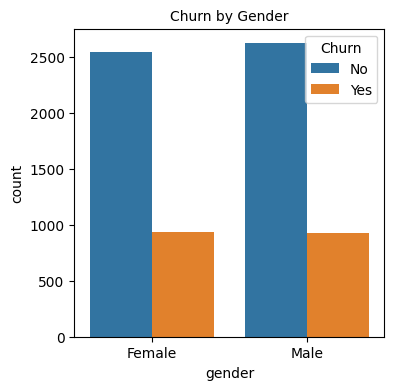

In [52]:
#checking the count on basis of gender
plt.figure(figsize=(4,4))
plt.title("Churn by Gender",fontsize = 10)
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.show()

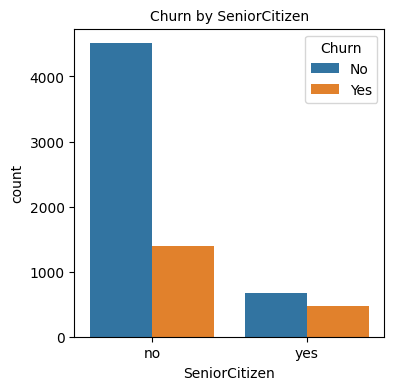

In [53]:
#checking the count on basis of senior citizen
plt.figure(figsize=(4,4))
plt.title("Churn by SeniorCitizen",fontsize = 10)
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.show()

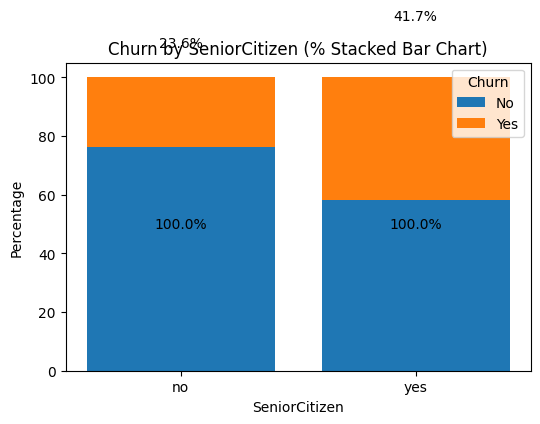

<Figure size 400x400 with 0 Axes>

In [61]:
#creating stacked bar chart for the same
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Step 2: Plot the stacked bar chart
categories = percentages.index
labels = percentages.columns

fig, ax = plt.subplots(figsize=(6, 4))
bottom = None

for label in labels:
    if bottom is None:
        bottom = percentages[label]
        ax.bar(categories, percentages[label], label=label)
    else:
        ax.bar(categories, percentages[label], bottom=bottom, label=label)
        bottom += percentages[label]

# Step 3: Annotate bars with percentage values
for category in categories:
    cumulative = 0
    for label in labels:
        percentage = percentages.loc[category, label]
        cumulative += percentage
        ax.text(
            category,
            cumulative - percentage / 2,
            f"{percentage:.1f}%",
            ha='center',
            va='center',
            fontsize=10
        )

# Final plot adjustments

plt.title("Churn by SeniorCitizen (% Stacked Bar Chart)", fontsize=12)

plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")

plt.xticks(categories)

plt.legend(title="Churn")
plt.figure(figsize=(4,4))
plt.show()

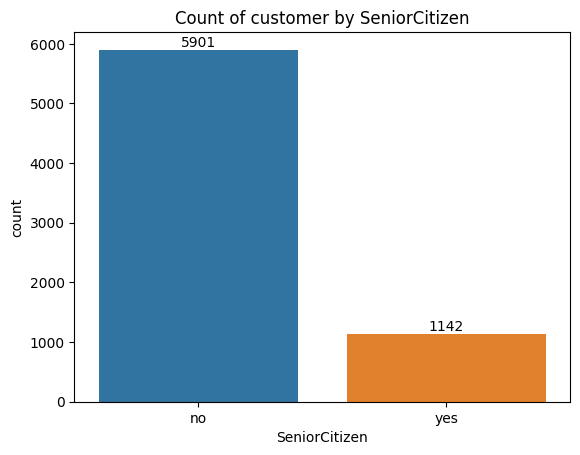

<Figure size 300x100 with 0 Axes>

In [60]:
ax = sns.countplot(x=df["SeniorCitizen"],data=df)
ax.bar_label(ax.containers[0]) #to have total count values on containers
plt.title("Count of customer by SeniorCitizen")
plt.figure(figsize=(3,1))
plt.show()

C:\Users\tejuh\AppData\Roaming\Python\Python312\site-packages\seaborn\_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\tejuh\AppData\Roaming\Python\Python312\site-packages\seaborn\_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\tejuh\AppData\Roaming\Python\Python312\site-packages\seaborn\_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


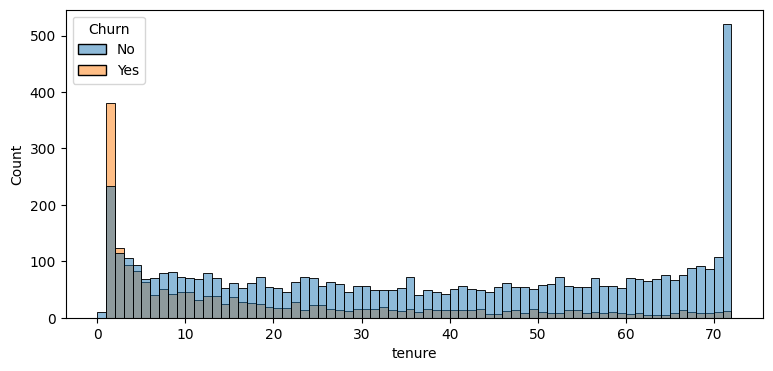

In [64]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data = df, bins =72, hue="Churn")
plt.show()

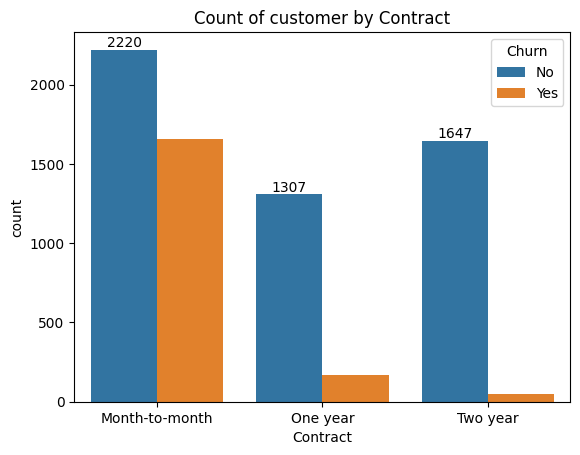

<Figure size 300x100 with 0 Axes>

In [66]:
ax = sns.countplot(x=df["Contract"],data=df,hue="Churn")
ax.bar_label(ax.containers[0]) #to have total count values on containers
plt.title("Count of customer by Contract")
plt.figure(figsize=(3,1))
plt.show()

In [69]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

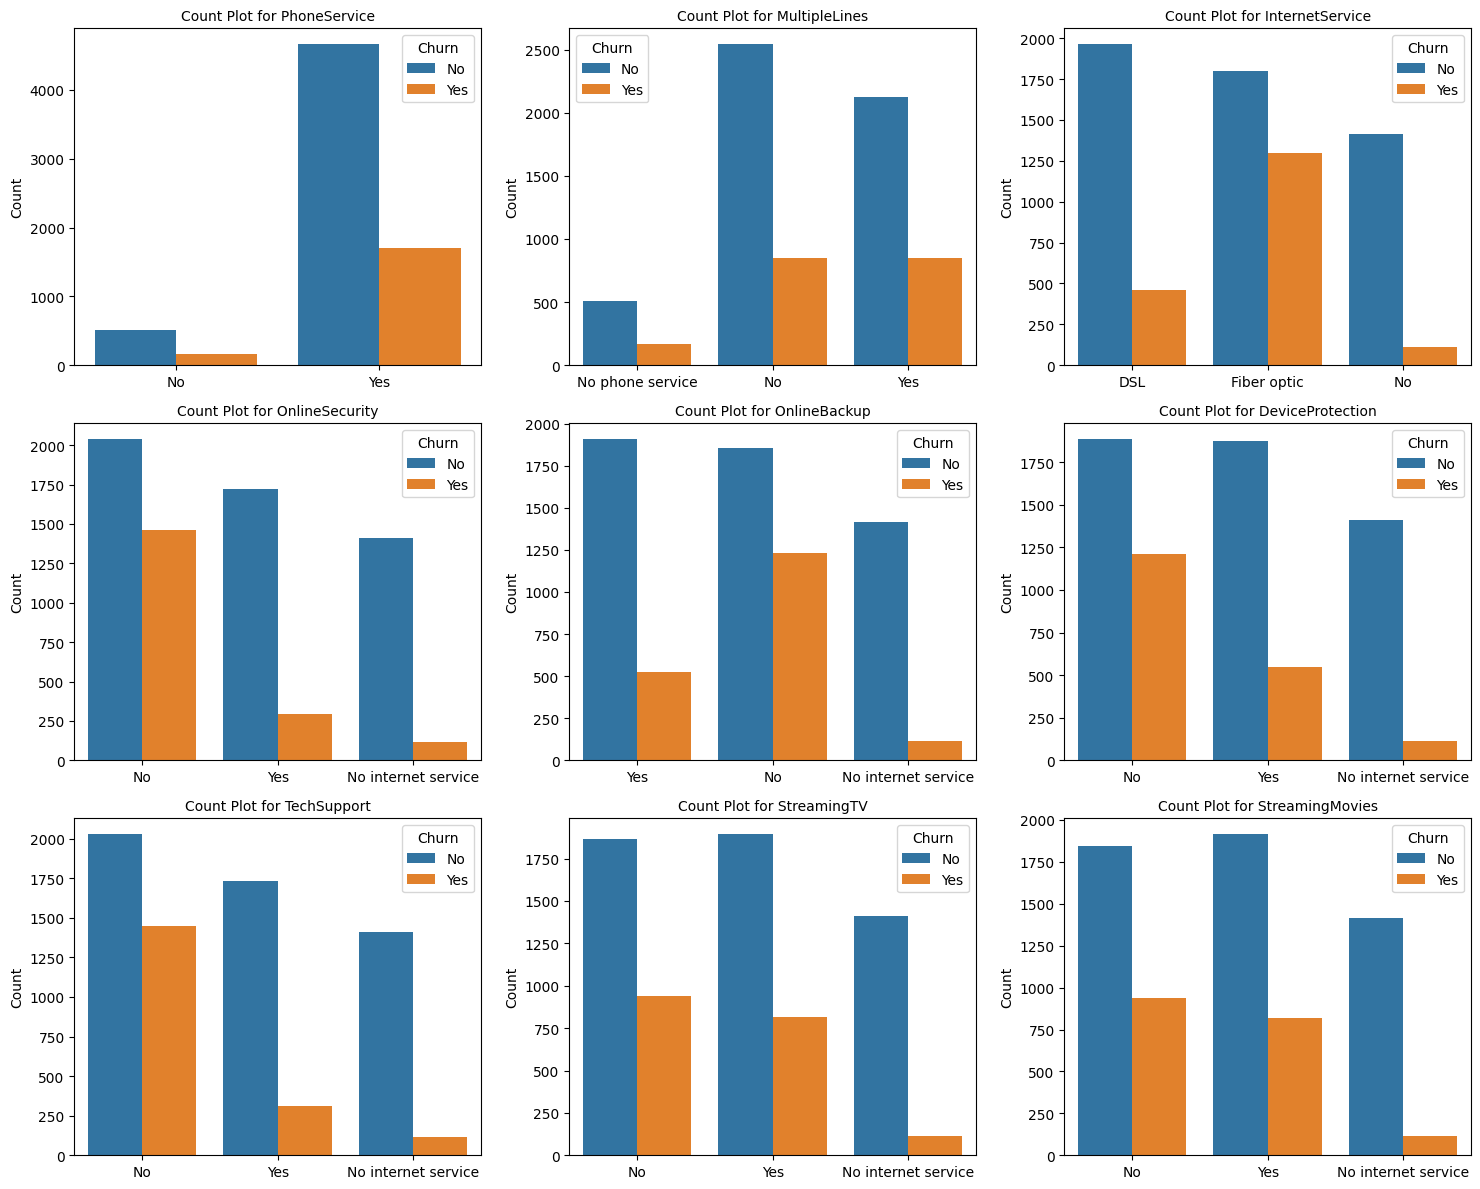

In [71]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Determine the grid size for subplots
n_cols = 3  # Number of columns in the subplot grid
n_rows = -(-len(columns) // n_cols)  # Calculate rows based on number of columns

# Set up the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten axes for easier indexing

# Loop through the columns and create count plots
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue ="Churn")
    axes[i].set_title(f"Count Plot for {col}", fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

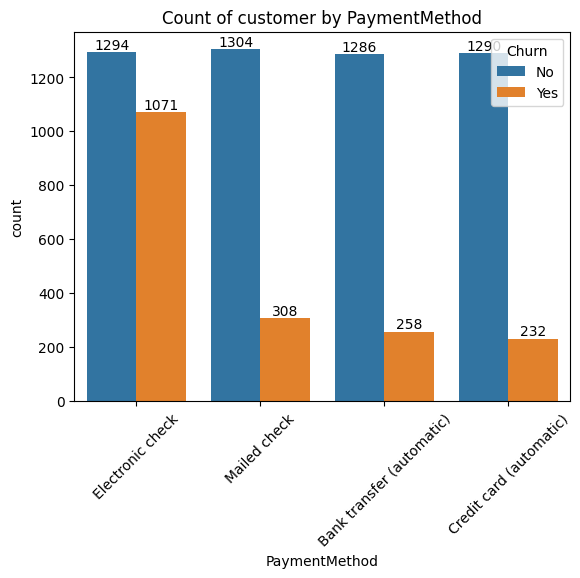

<Figure size 300x100 with 0 Axes>

In [75]:
ax = sns.countplot(x=df["PaymentMethod"],data=df,hue="Churn")
ax.bar_label(ax.containers[0]) #to have total count values on containers
ax.bar_label(ax.containers[1])
plt.title("Count of customer by PaymentMethod")
plt.xticks(rotation = 45)
plt.figure(figsize=(3,1))

plt.show()